<a href="https://colab.research.google.com/github/code-deenah/object-detection/blob/main/Object_detection_on_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Feb 10 16:50:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.5/709.5 kB 10.5 MB/s eta 0:00:00


In [4]:
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="D8aHqyKTdvyZcW0St4Jb")
project = rf.workspace("treedataset-clsqo").project("tree-top-view")
dataset = project.version(6).download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tree-Top-View-6 in yolov8-obb:: 100%|██████████| 2780/2780 [00:00<00:00, 5499.74it/s]


In [8]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=20 imgsz=600

100% 6.23M/6.23M [00:00<00:00, 126MB/s]
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Tree-Top-View-6/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1707584432.a7eaf8c261dc.3328.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch760.jpg	weights
P_curve.png					    train_batch761.jpg
PR_curve.png					    train_batch762.jpg


In [10]:
from IPython.display import display, Image

/content


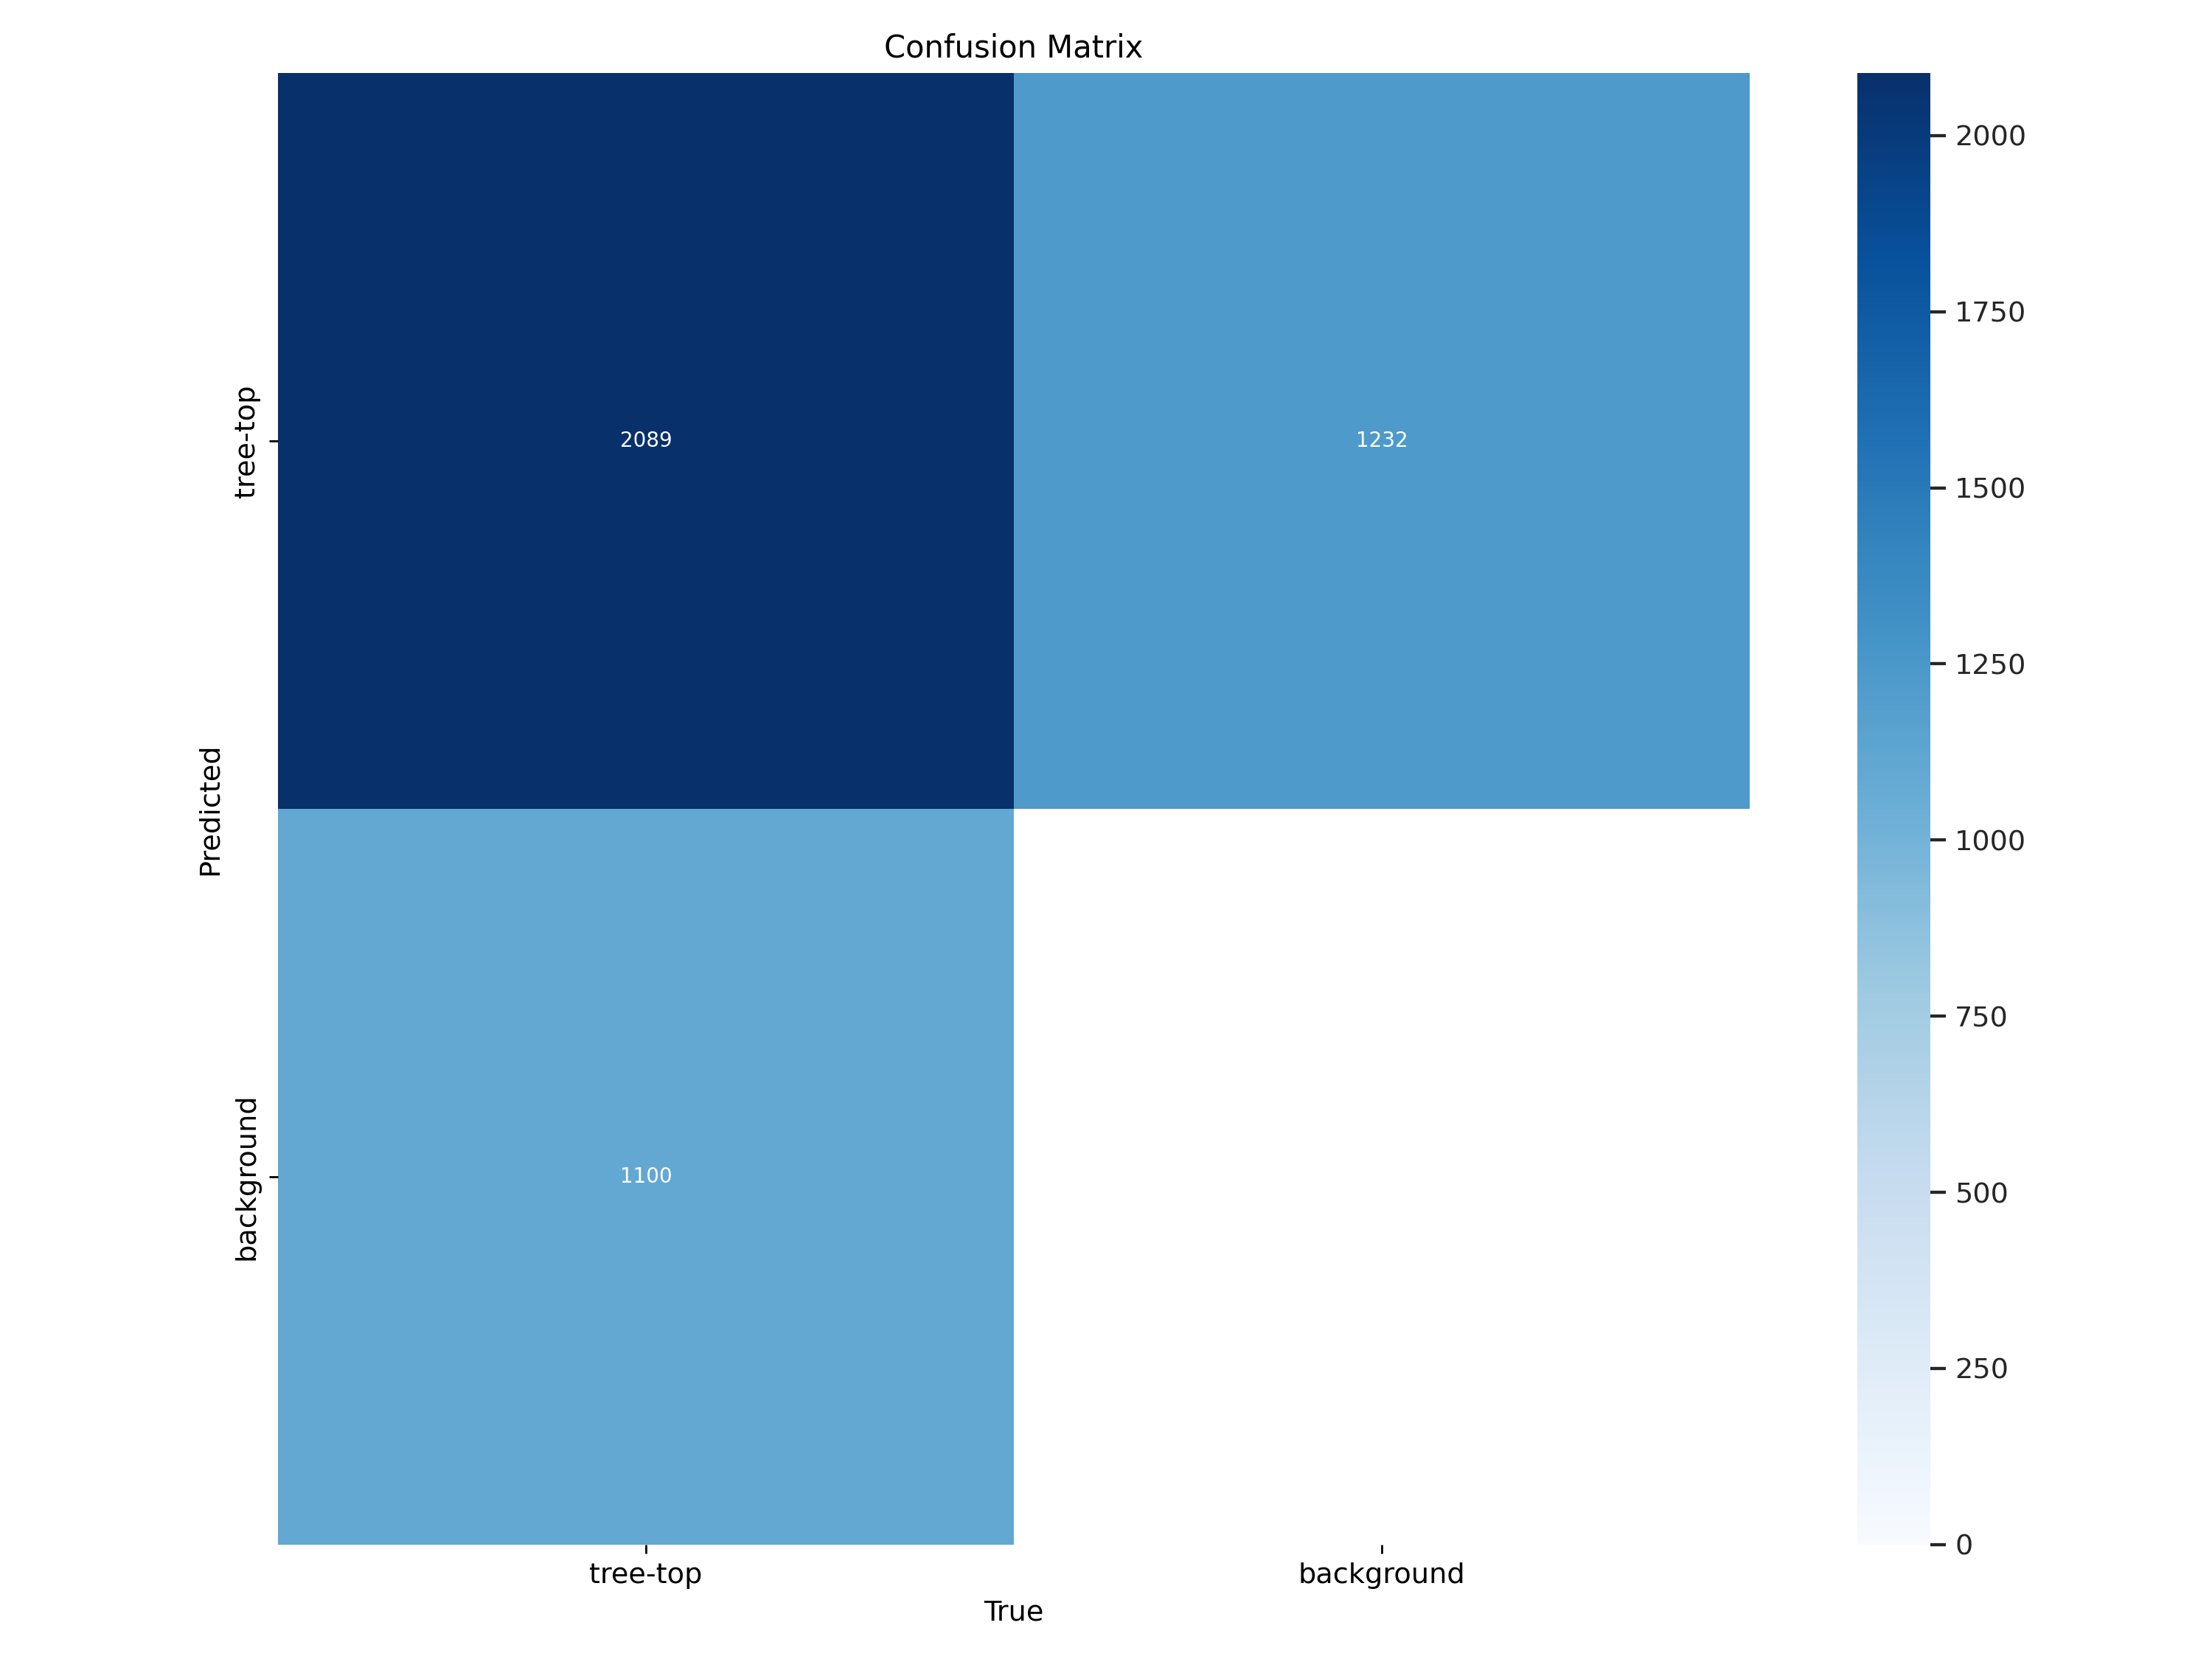

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

/content


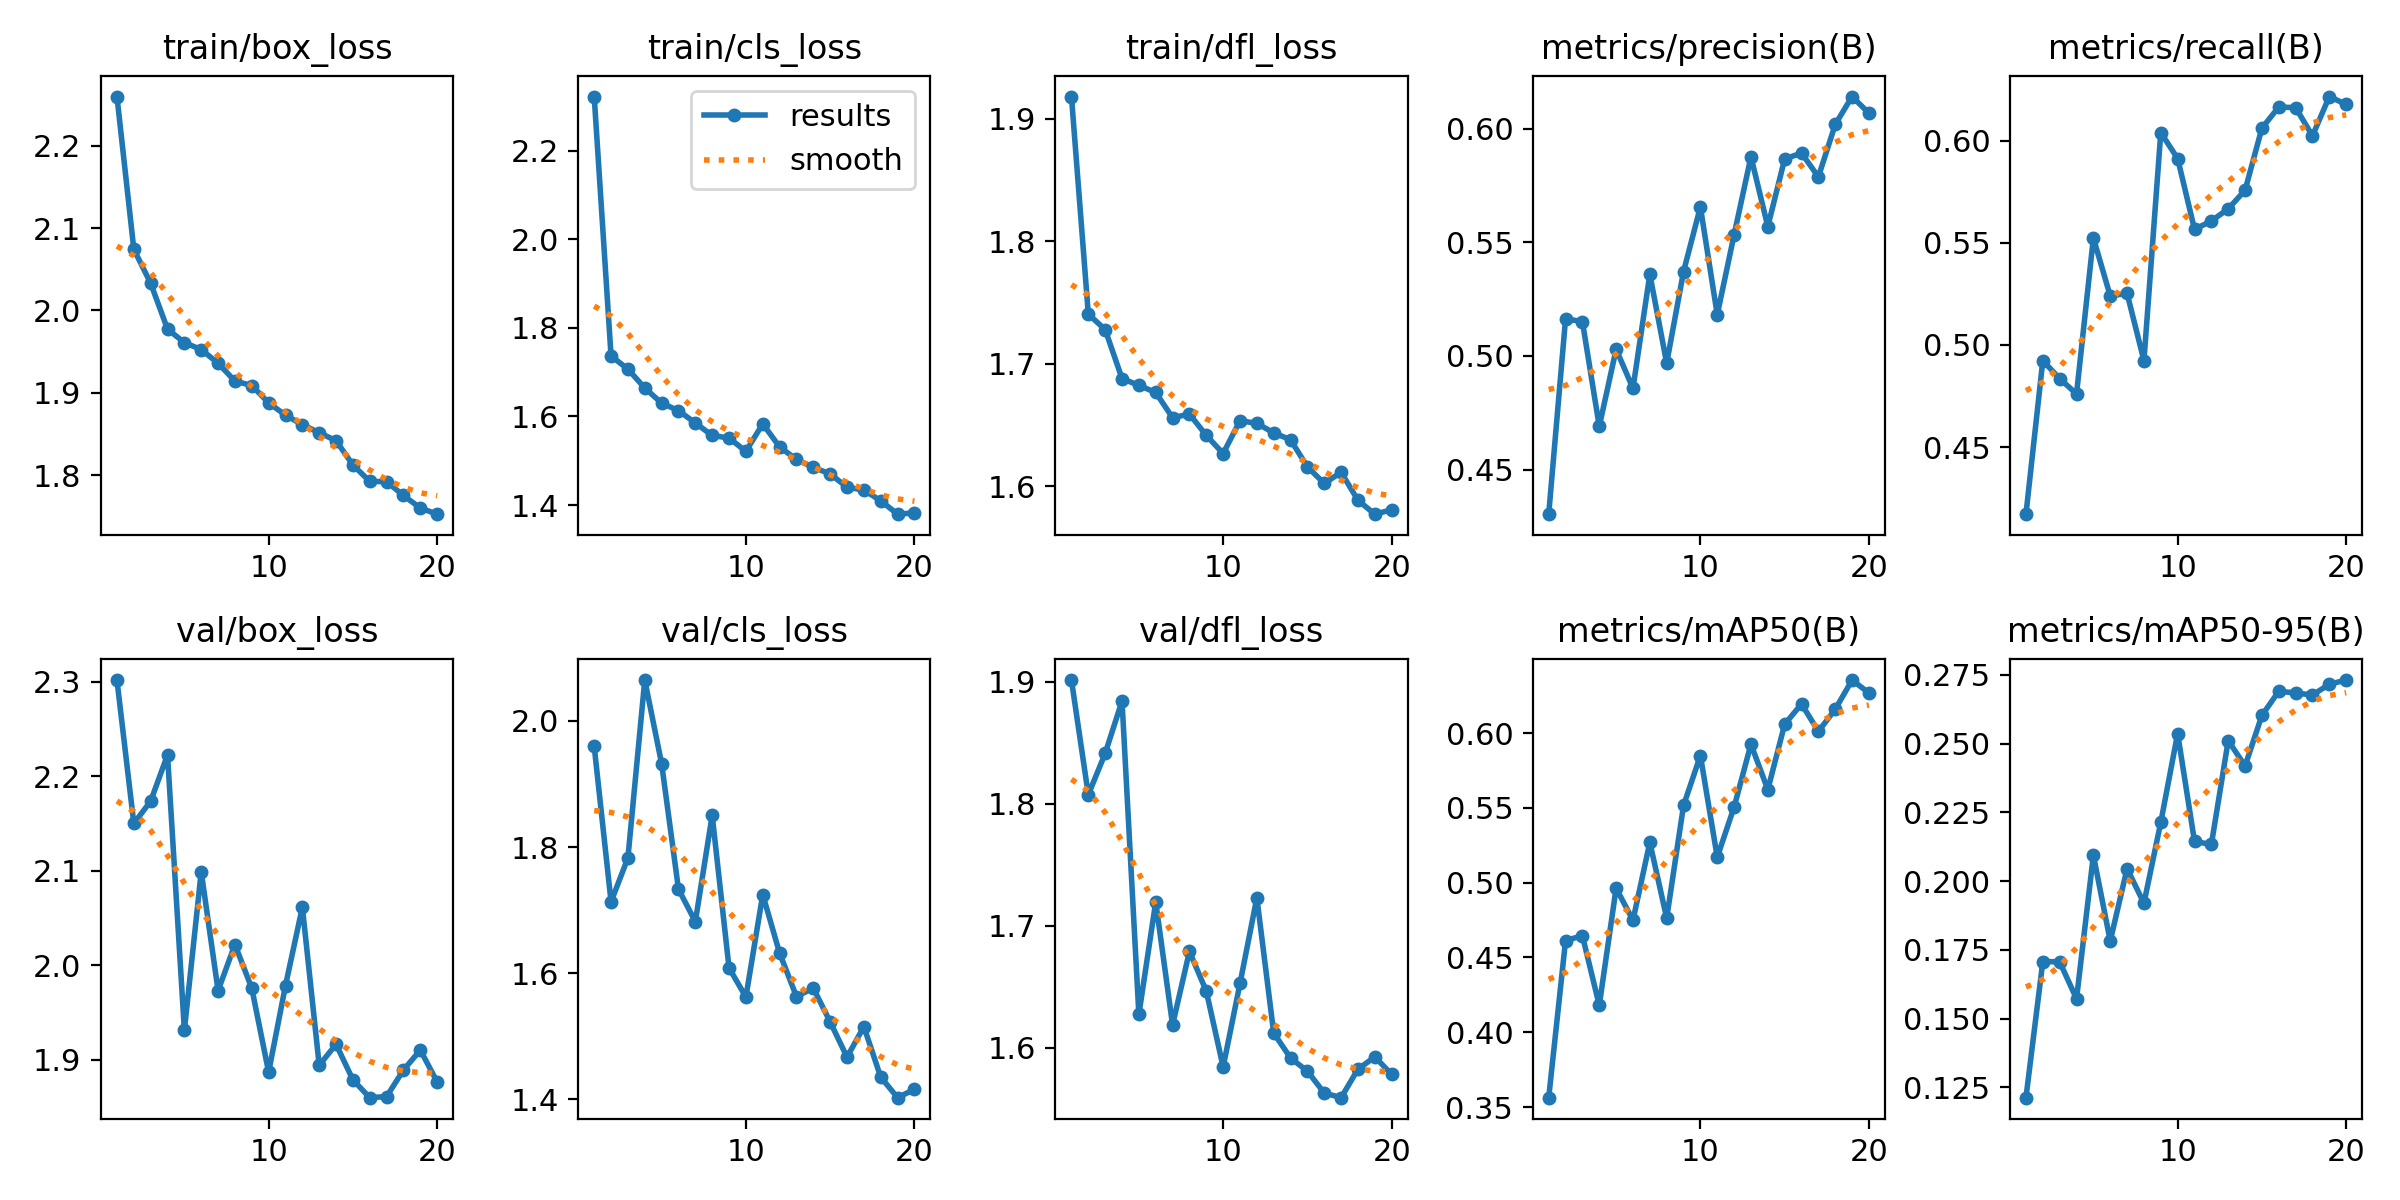

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/content


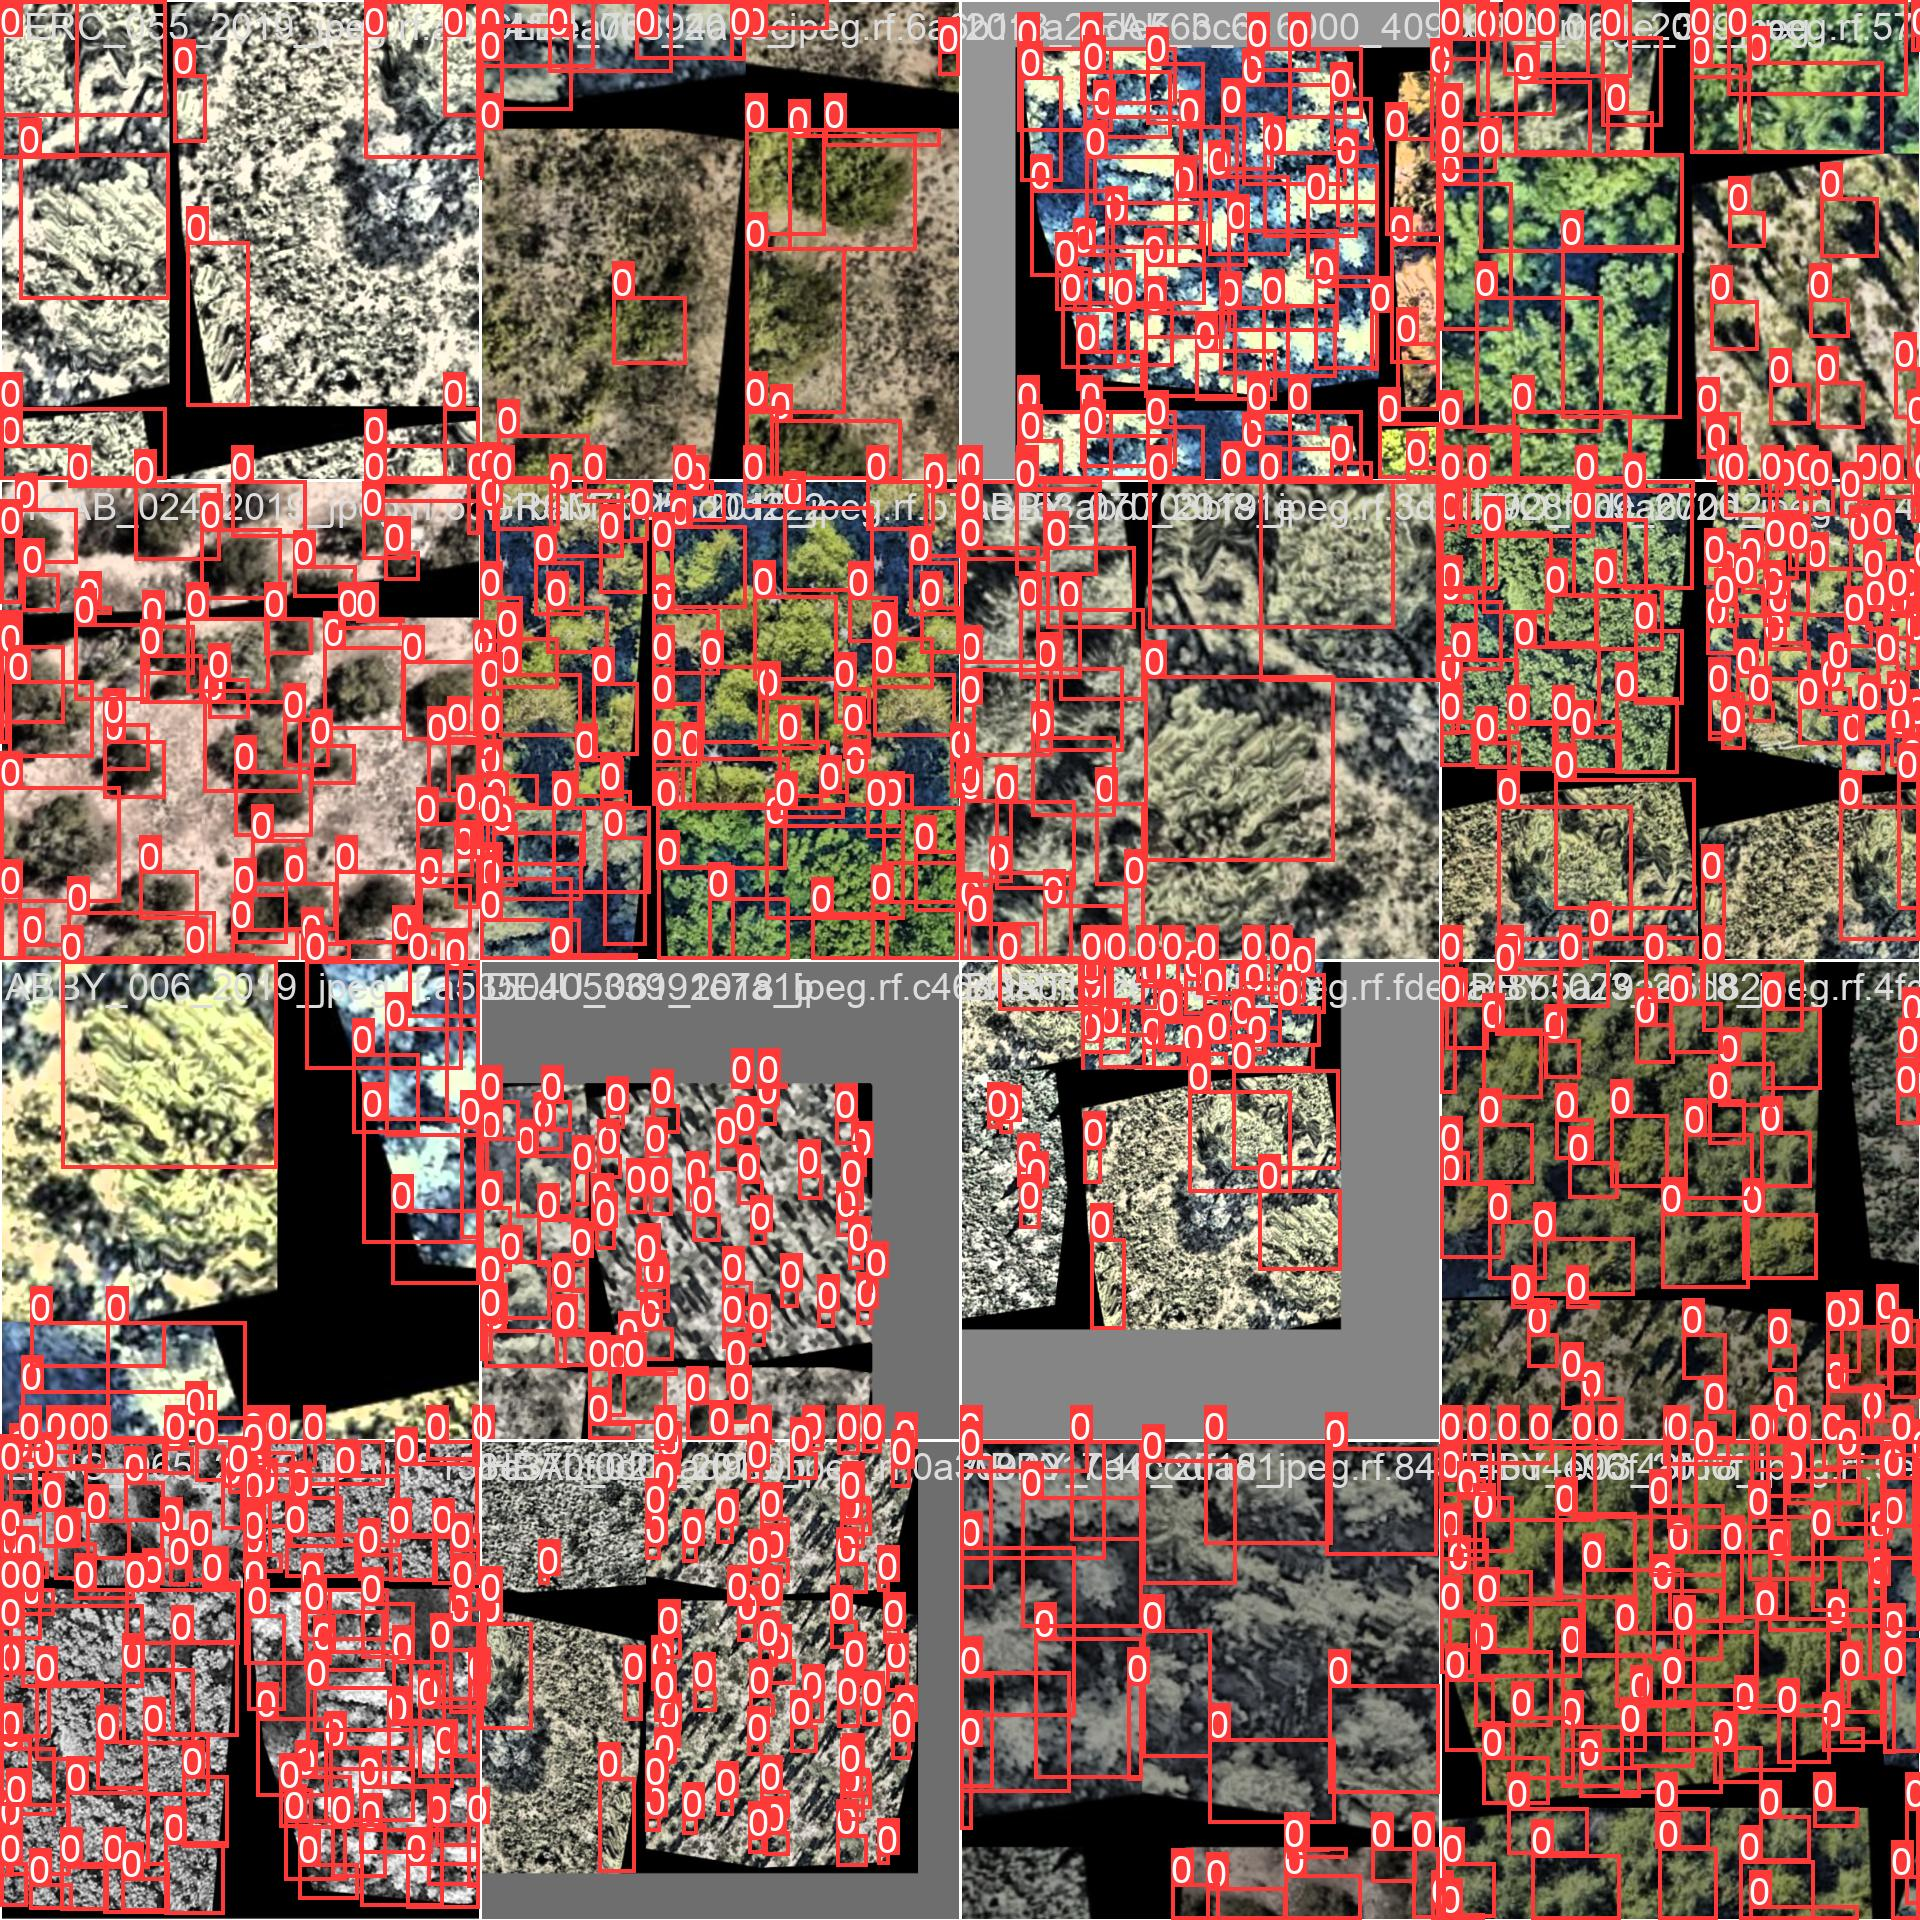

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch1.jpg', width=200)

/content


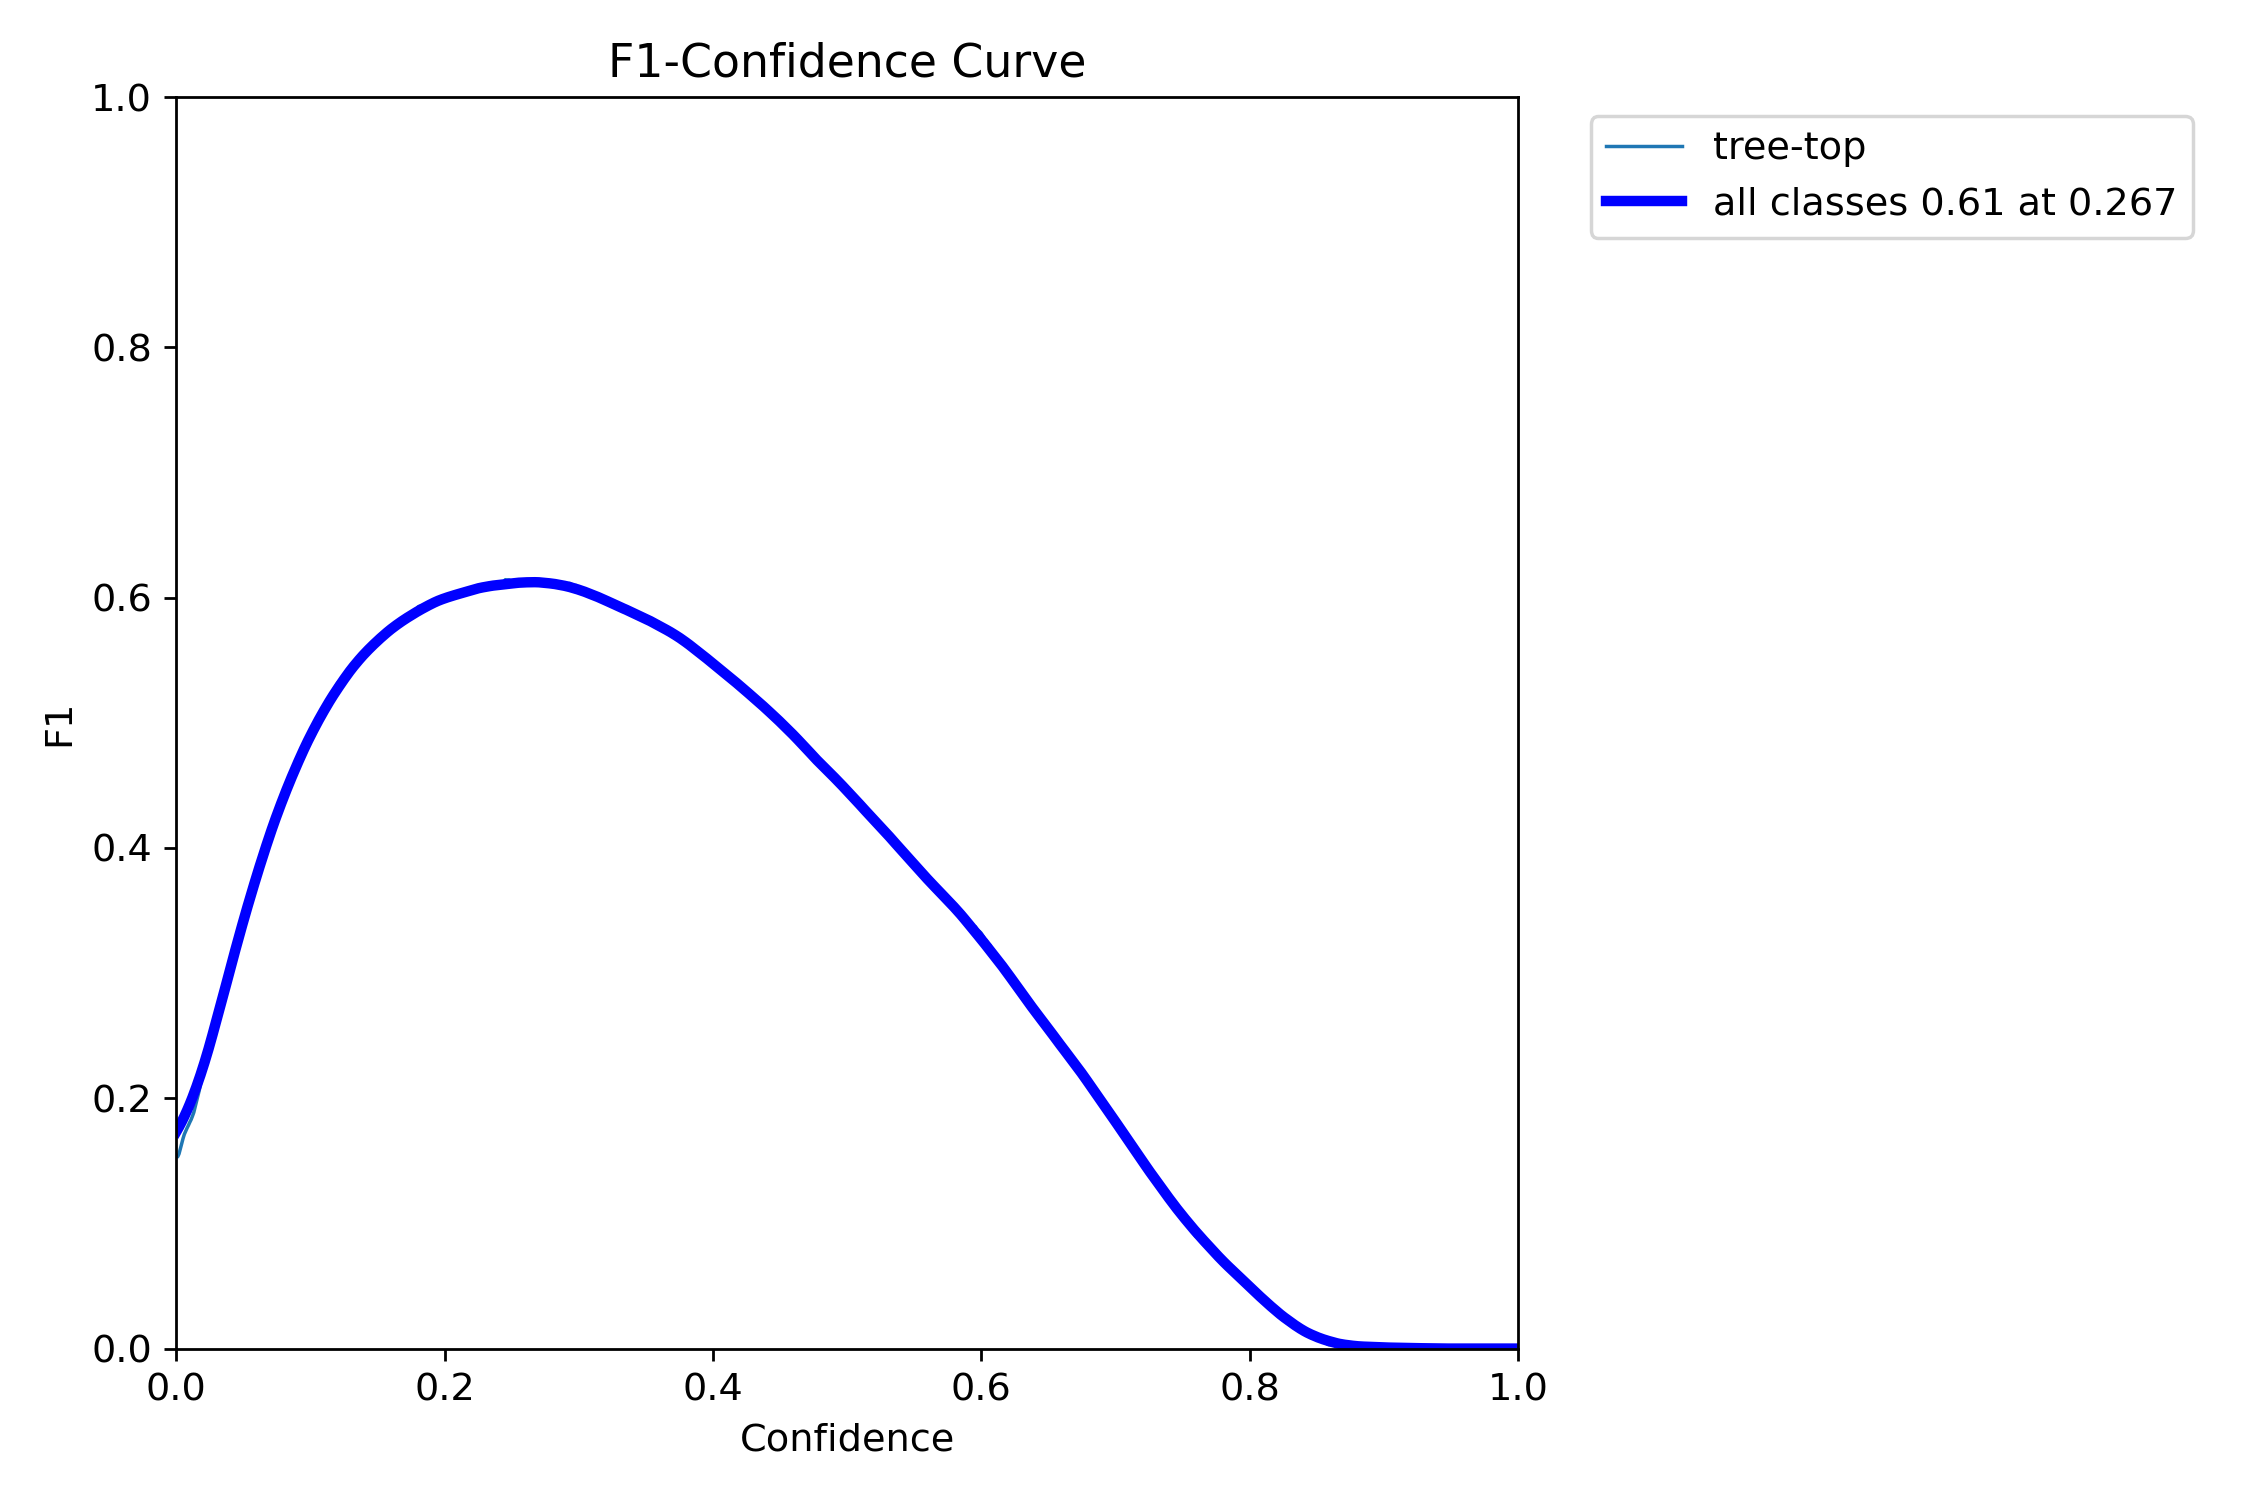

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=800)

In [14]:
%cd
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/root
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Tree-Top-View-6/valid/labels.cache... 118 images, 2 backgrounds, 0 corrupt: 100% 118/118 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:20<00:00,  2.58s/it]
                   all        118       3189      0.607      0.618      0.627      0.273
Speed: 5.6ms preprocess, 7.6ms inference, 0.0ms loss, 21.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/60 /content/Tree-Top-View-6/test/images/13_jpg.rf.0d0ec444b9911cc17b09f7a62f3104e8.jpg: 608x608 17 tree-tops, 17.7ms
image 2/60 /content/Tree-Top-View-6/test/images/17_jpg.rf.a155f68af1ff11a50d208c47c2a9a7eb.jpg: 608x608 49 tree-tops, 7.3ms
image 3/60 /content/Tree-Top-View-6/test/images/2018_SJER_3_252000_4106000_image_234_jpeg.rf.5bf0ffaf21b4ca17d380f3a79550f4c8.jpg: 608x608 (no detections), 7.2ms
image 4/60 /content/Tree-Top-View-6/test/images/2018_SJER_3_252000_4106000_image_326_jpeg.rf.973c90998bb890b51465ab12a6fe66e5.jpg: 608x608 (no detections), 7.2ms
image 5/60 /content/Tree-Top-View-6/test/images/2018_SJER_3_252000_4108000_image_517_jpeg.rf.2140d7254f469763e42c1f9d32ec0dac.jpg: 608x608 3 tree-tops, 7.2ms
image 6/60 /content/Tree-Top-View-6/test/images/2018_SJER_3_252000_4113000_image_323_jpeg.rf.

/content


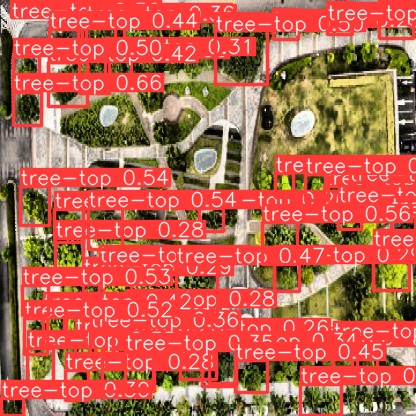

In [16]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict/17_jpg.rf.a155f68af1ff11a50d208c47c2a9a7eb.jpg', width=800)

Here is a new downloaded image on which we are gonna test the model

/content


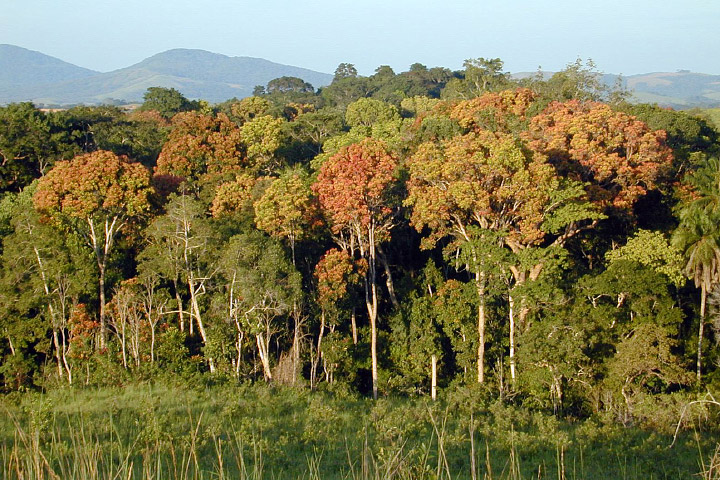

In [24]:
%cd {HOME}
Image(filename=f'/content/forest.jpg', width=800)

In [25]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/forest.jpg

/content
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/forest.jpg: 416x608 19 tree-tops, 90.8ms
Speed: 3.7ms preprocess, 90.8ms inference, 541.1ms postprocess per image at shape (1, 3, 416, 608)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


the results are saved in runs/detect/predict3
Now we will open that file

/content


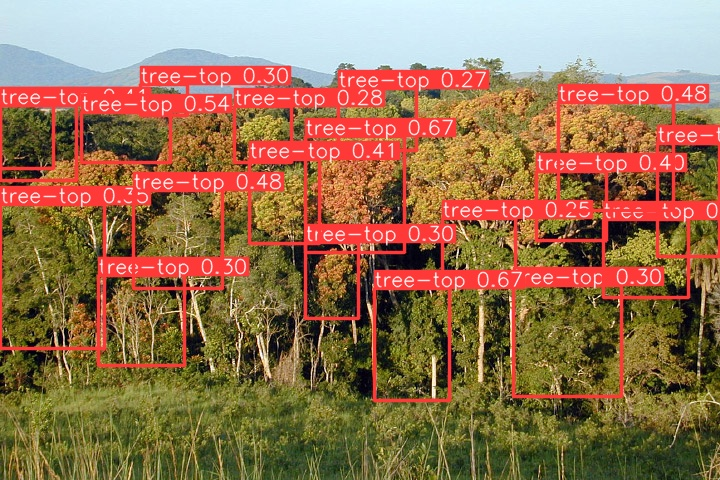

In [26]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict5/forest.jpg', width= 500 )

In summary, by identifying areas with low tree coverage, we aim to strategically plant trees to reduce pollution. This initiative aligns with our commitment to environmental stewardship, fostering healthier ecosystems, cleaner air, and a sustainable future for all. Let's plant trees where they're needed most to combat pollution effectively.